In [5]:
import rasterio
import datacube
from datacube.utils.cog import write_cog

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.plotting import rgb
from dea_tools.climate import load_era5

In [3]:
dc = datacube.Datacube(app='barkly')

In [4]:
xmin = 134.026725505556
xmax = 137.45773037202082
ymin = -21
ymax = -18.44953772929013
time = ('2022-01', '2022-12')

query = {
    'x': (xmin, xmax),
    'y': (ymin, ymax),
    'time': time,
    'measurements': ['red', 'green', 'blue'],
    'output_crs': 'EPSG:3577',
    'resolution': (-250, 250),
    'group_by': 'solar_day'
}

# Load available data from the Landsat 8
ds = dc.load(product='ga_ls8c_nbart_gm_cyear_3', **query)

# Print output data
ds

<xarray.Dataset>
Dimensions:      (time: 1, y: 1176, x: 1466)
Coordinates:
  * time         (time) datetime64[ns] 2022-07-02T11:59:59.999999
  * y            (y) float64 -1.974e+06 -1.974e+06 ... -2.267e+06 -2.267e+06
  * x            (x) float64 2.094e+05 2.096e+05 ... 5.754e+05 5.756e+05
    spatial_ref  int32 3577
Data variables:
    red          (time, y, x) int16 1302 1463 1248 1198 ... 1509 1508 1559 1528
    green        (time, y, x) int16 854 883 829 814 831 ... 923 900 897 937 904
    blue         (time, y, x) int16 497 512 503 503 500 ... 523 512 506 533 510
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

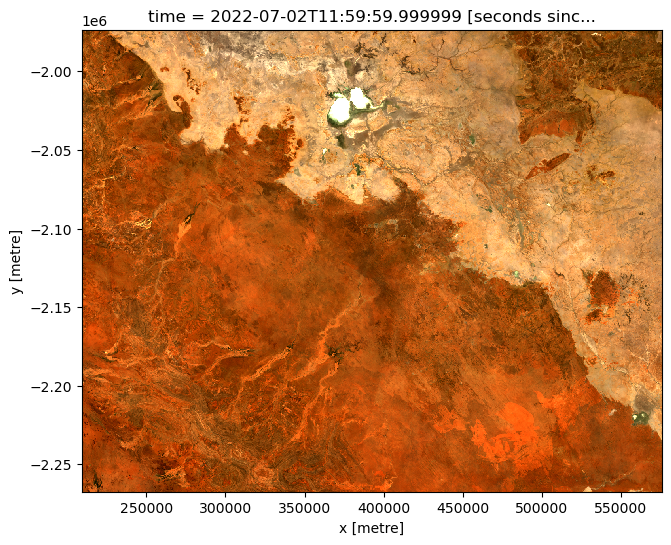

In [4]:
rgb(ds, bands=["red", "green", "blue"])

In [5]:
rgb_da = ds.isel(time=0).to_array()

write_cog(geo_im=rgb_da,
          fname='barkly_rgb.tif',
          overwrite=True)

PosixPath('barkly_rgb.tif')